In [15]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('clean.csv')
data.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,27.0,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,28.7,95.0,76.0,0
2,2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,25.3,75.0,70.0,0
3,3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,28.6,65.0,103.0,1
4,4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,23.1,85.0,85.0,0


In [21]:
X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']

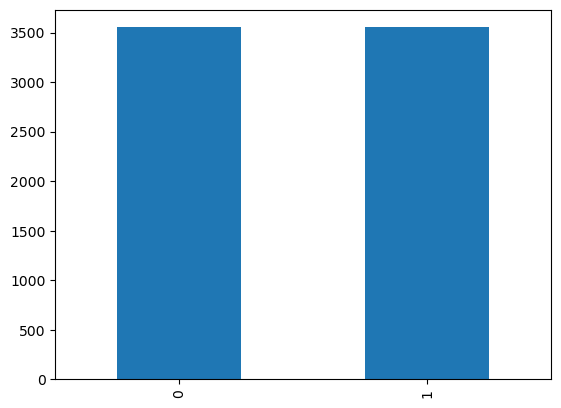

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X, y)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)
X_train.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
3606,3653,0,38,1.0,1,30.0,0.0,0,0,0,164.0,113.0,25.8,70.0,75.0
794,805,1,49,3.0,1,3.0,0.0,0,0,0,219.0,130.0,24.4,60.0,65.0
3366,3411,1,63,1.0,1,9.0,0.0,0,0,0,188.0,113.0,29.0,74.0,93.0
1536,1556,0,43,2.0,0,0.0,0.0,0,0,0,213.0,96.0,19.4,74.0,80.0
1561,1583,1,36,2.0,1,20.0,0.0,0,0,0,242.0,118.5,24.0,78.0,103.0


In [24]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
# X_train.head()

X_train.columns= X.columns   
X_test.columns= X.columns

y_train.index= X_train.index
y_test.index= X_test.index

X_train.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1.243129,-0.778015,-1.634168,-0.951829,1.204079,1.805695,-0.230397,-0.056354,-0.644854,-0.149927,-1.770943,-1.042449,-0.062541,-0.538921,-0.315970
1,-1.064499,1.285322,-0.278858,1.149131,1.204079,-0.558866,-0.230397,-0.056354,-0.644854,-0.149927,-0.476837,-0.285268,-0.427984,-1.434880,-0.684603
2,1.047045,1.285322,1.446081,-0.951829,1.204079,-0.033408,-0.230397,-0.056354,-0.644854,-0.149927,-1.206242,-1.042449,0.772756,-0.180537,0.347570
3,-0.455992,-0.778015,-1.018118,0.098651,-0.830510,-0.821595,-0.230397,-0.056354,-0.644854,-0.149927,-0.618012,-1.799631,-1.733136,-0.180537,-0.131653
4,-0.434114,1.285322,-1.880587,0.098651,1.204079,0.929932,-0.230397,-0.056354,-0.644854,-0.149927,0.064334,-0.797479,-0.532396,0.177847,0.716203


In [25]:
from sklearn.metrics import classification_report
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [26]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
predictions = model.predict(X_test)

Classificatio report               precision    recall  f1-score   support

           0       0.71      0.70      0.70       719
           1       0.70      0.70      0.70       703

    accuracy                           0.70      1422
   macro avg       0.70      0.70      0.70      1422
weighted avg       0.70      0.70      0.70      1422

********
Accuracy with Logistic Regression:  0.7018284106891702
********
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       719
           1       0.70      0.70      0.70       703

    accuracy                           0.70      1422
   macro avg       0.70      0.70      0.70      1422
weighted avg       0.70      0.70      0.70      1422



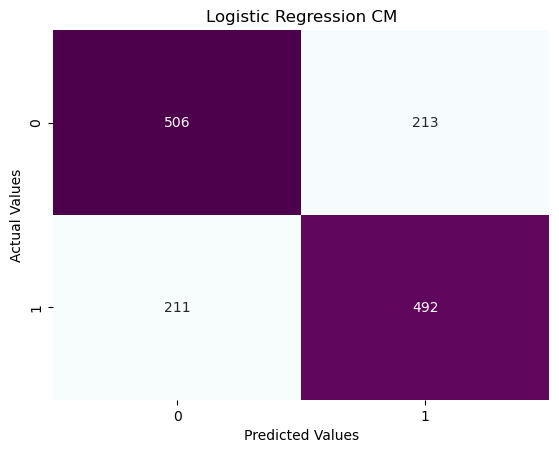

The confusion matrix [[506 213]
 [211 492]]


In [28]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

print('Classificatio report',classification_report(y_test,predictions))
print('********')

print('Accuracy with Logistic Regression: ',accuracy_score(y_test,predictions))
print('********')

print('The confusion matrix',my_confusion_matrix(y_test,predictions,'Logistic Regression CM'))